<a href="https://colab.research.google.com/github/adilimam12/adilimam12/blob/main/individual_notebook_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [92]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [93]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [94]:
#loading the data set
data='/content/drive/MyDrive/almabetter/capstone project1/ Play Store Data.csv'

In [95]:
review='/content/drive/MyDrive/almabetter/capstone project1/ Play Store Data.csv'

In [96]:
df_data=pd.read_csv(data)
df_review=pd.read_csv(review)

In [97]:
df_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [98]:
df_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [99]:
df_data.shape

(10841, 13)

**STEP :-1 CHECKING THE DATA LIKE NUMBER OF ROW AND COLUMNS**

In [100]:
df_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


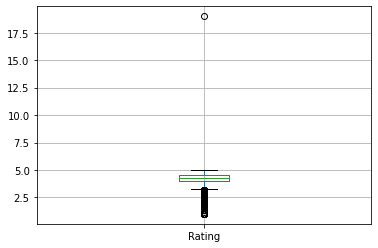

In [101]:
df_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26b006da50>]],
      dtype=object)

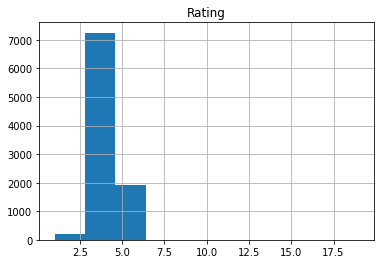

In [102]:
df_data.hist()

***Data Preparation and Cleaning***


**STEP(2):- CHECKING THE DATA TYPE OF COLUMNS ,MISSING VALUES ,SPLITTING VALUES**

In [103]:
def printinfo():
    temp = pd.DataFrame(index=df_data.columns)
    temp['data_type'] = df_data.dtypes
    temp['null_count'] = df_data.isnull().sum()
    temp['unique_count'] = df_data.nunique()
    return temp

In [104]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


By diagnosing the data frame, we know that:

(1)There are 13 columns of properties with 10841 rows of data. (2)Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object' (3)Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'. (4)Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'. (5)Values of column 'Price' are strings representing price with symbol '$'.



**STEP(3):- CHANGING THE DATA TYPE OF COLUMNS AS (.astype())**

In [105]:
df_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [106]:
print(df_data['Type'].mode())

0    Free
dtype: object


In [107]:
print(df_data['Current Ver'].mode())

0    Varies with device
dtype: object


In [108]:
print(df_data['Android Ver'].mode())

0    4.1 and up
dtype: object


In [109]:
print(df_data['Content Rating'].mode())

0    Everyone
dtype: object


In [110]:
df_data['Type'].fillna(str(df_data['Type'].mode().values[0]),inplace = True)
df_data['Current Ver'].fillna(str(df_data['Current Ver'].mode().values[0]),inplace = True)
df_data['Android Ver'].fillna(str(df_data['Android Ver'].mode().values[0]),inplace = True)
df_data['Content Rating'].fillna(str(df_data['Content Rating'].mode().values[0]),inplace = True)


In [111]:
df_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [112]:
df_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

So we got 34 category on this dat aset, let’s see which one is the famous category

1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

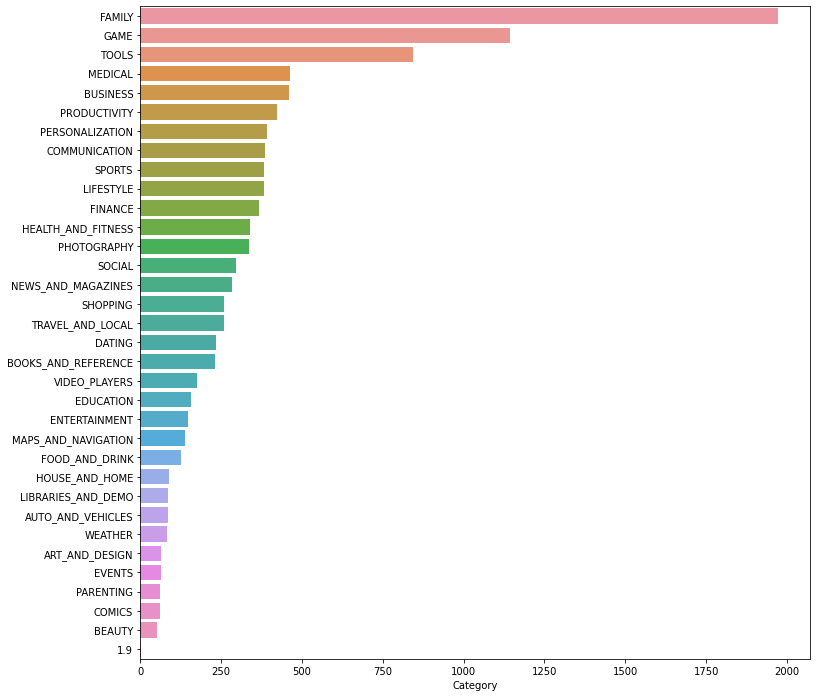

In [113]:
plt.figure(figsize=(12,12))
most_cat = df_data.Category.value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df_data)

In [114]:
df_data[df_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


We can make NaN category value. At that time we can get a clean data. I used shift() method that is found Pandas library.

In [115]:
df_data.loc[10472] = df_data.loc[10472].shift()
df_data['App'].loc[10472] = df_data['Category'].loc[10472]
df_data['Category'].loc[10472] = np.nan
df_data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                           Everyone
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

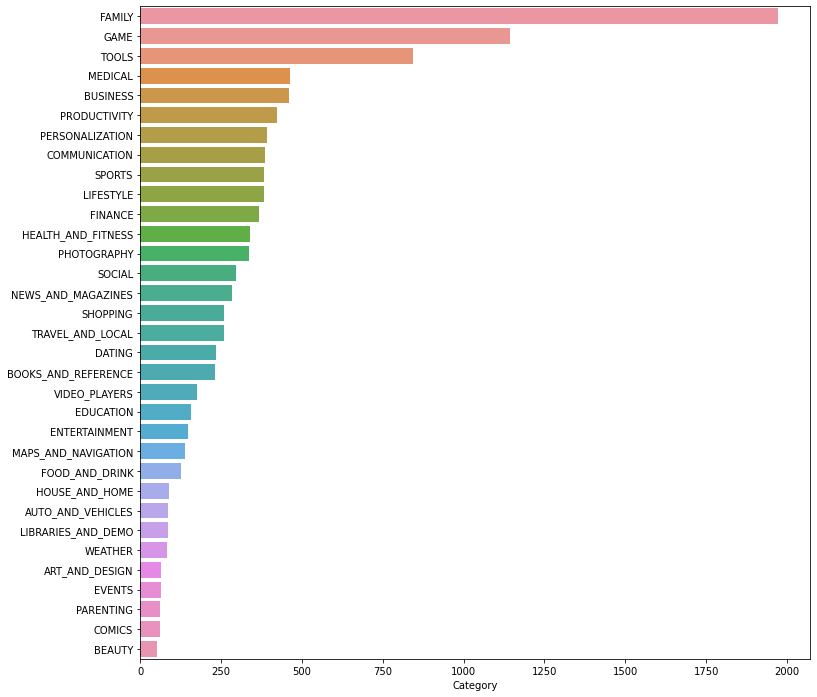

In [116]:
plt.figure(figsize=(12,12))
most_cat = df_data.Category.value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df_data)

So, there is around 2000 app with family category, followed by game category with 1200 app.

In [117]:
df_data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

**Data type of Rating is object. If we convert from string to numeric, we can make easy.**

In [118]:
df_data['Rating'] = pd.to_numeric(df_data['Rating'], errors='coerce')
df_data['Rating'].dtype

dtype('float64')

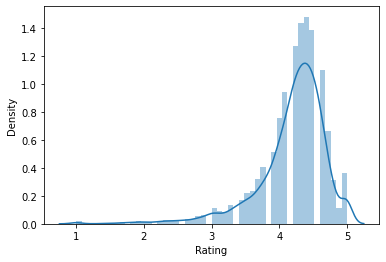

In [119]:
sns.distplot(df_data.Rating)

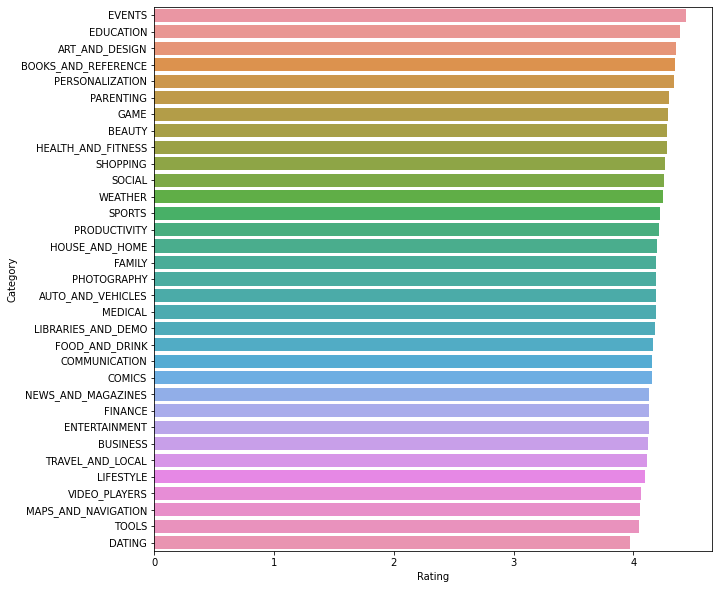

In [120]:
# Mean Rating
plt.figure(figsize=(10,10))
mean_rat = df_data.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rat, y=mean_rat.index, data=df_data)

And this is the average of rating by category, family and game has a lot of quantity causing the low on average rating, on the other side event has the highest average rating by category.

In [121]:
df_data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [122]:
df_data[df_data['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [123]:
df_data['Reviews'] = df_data.Reviews.replace("0.0",0)
df_data['Reviews'] = df_data.Reviews.replace("3.0M",3000000.0)
df_data['Reviews'] = df_data['Reviews'].astype(float)
df_data['Reviews'].dtype

dtype('float64')

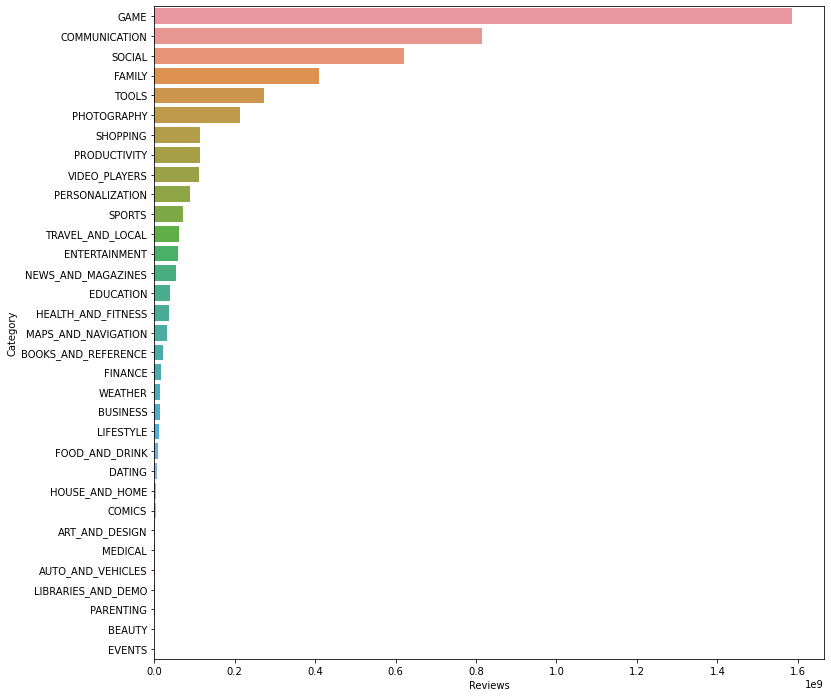

In [124]:
# Total reviews
plt.figure(figsize=(12,12))
sum_rew =df_data.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sum_rew, y=sum_rew.index, data=df_data)

Showing the amount of total reviews

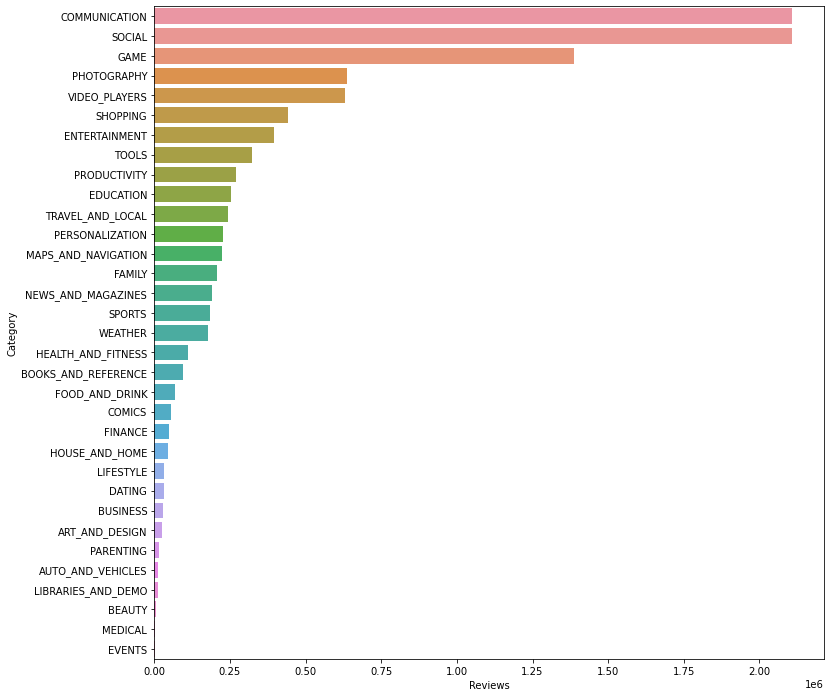

In [125]:
 # Mean reviews
plt.figure(figsize=(12,12))
mean_rew = df_data.groupby(['Category'])['Reviews'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rew, y=mean_rew.index, data=df_data)

This is the average of reviews on each category. Let’s move on to next column, installs.


In [126]:
df_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.

In [127]:
#converting all the sizes to MB
data = df_data[~df_data.isin(['Varies with device']).any(axis=1)]

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000

data['Size'] = data['Size'].apply(value_to_float)
data['Size'] = pd.to_numeric(data['Size'], downcast='float')
data['Size'] = data['Size']/1000000
data.Size.unique()


array([ 19. ,  14. ,   8.7,   2.8,   5.6,  29. ,  33. ,   3.1,  28. ,
        12. ,  20. ,  21. ,  37. ,   5.5,  17. ,  39. ,  31. ,   4.2,
         7. ,  23. ,   6. ,  25. ,   6.1,   4.6,   9.2,   5.2,  11. ,
        24. ,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,   7.9,  56. ,
        57. ,  35. ,  54. ,   nan,   3.6,   5.7,   8.6,   2.4,  27. ,
         2.7,   2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,  32. ,
         5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,   6.7,
        30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,   8.2,
         9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,   3.5,
         4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,   6.5,
         1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,   8.3,   4.3,
         4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,  61. ,  66. ,
         8.4,  44. ,   1.6,   6.2,  53. ,   1.4,   3. ,   5.8,   3.8,
         9.6,  45. ,  63. ,  49. ,  77. ,   4.4,   4.8,  70. ,   6.9,
         9.3,   8.1,

In [65]:
df_data['Installs'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [128]:
df_data['Installs'] = df_data['Reviews'].astype(float)
df_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,159.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,967.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,87510.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,215644.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,967.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


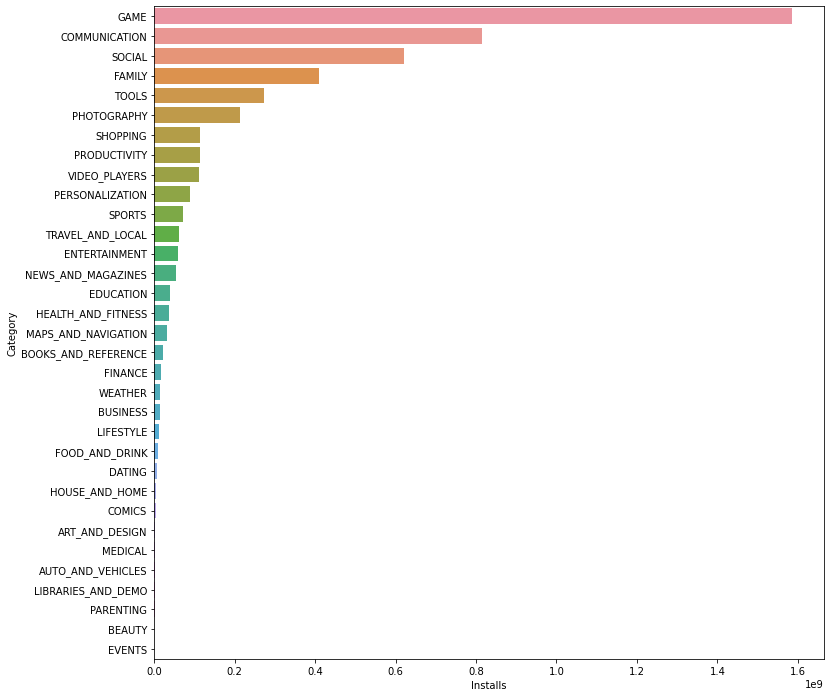

In [129]:
# Total Installs
plt.figure(figsize=(12,12))
sum_inst = df_data.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=sum_inst, y=sum_inst.index, data=df_data)

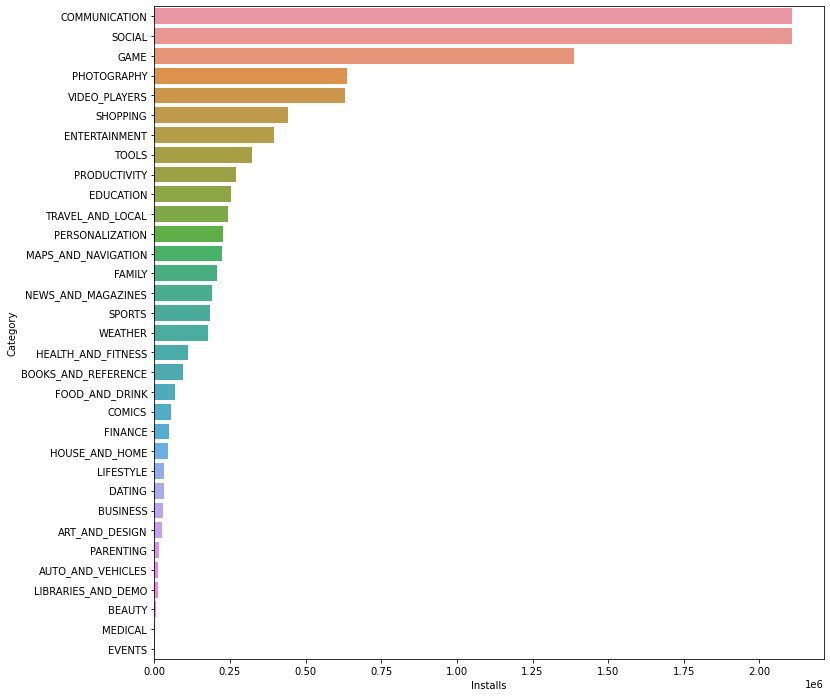

In [130]:
# Mean Install
plt.figure(figsize=(12,12))
mean_ints = df_data.groupby(['Category'])['Installs'].mean().sort_values(ascending=False)
sns.barplot(x=mean_ints, y=mean_ints.index, data=df_data)

In [142]:
df_data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [141]:
# in this we have removed unneccessary symbols
playstore_df2=df_data.replace('[+,$]','',regex=True)
playstore_df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,159.0,Free,0.0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,967.0,Free,0.0,Everyone,Art & Design;Pretend Play,January 15 2018,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510.0,8.7M,87510.0,Free,0.0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,215644.0,Free,0.0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,967.0,Free,0.0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,38.0,Free,0.0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,4.0,Free,0.0,Everyone,Education,July 6 2018,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,3.0,Free,0.0,Everyone,Medical,January 20 2017,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,114.0,Free,0.0,Mature 17,Books & Reference,January 19 2015,Varies with device,Varies with device


In [143]:
df_data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [144]:
df_data = df_data.drop([df_data.index[8004]])
df_data['Last Updated'] = pd.to_datetime(df_data['Last Updated'])
df_data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [145]:
# Android Version
df_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.

In [146]:
df_data['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
df_data['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df_data['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df_data['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df_data['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df_data['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df_data['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df_data['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df_data['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df_data['Android Ver'].fillna('1.0', inplace=True)

Category        Android Ver
ART_AND_DESIGN  4.0            51
                2.0             9
                1.0             2
                3.0             2
                5.0             1
                               ..
WEATHER         4.0            38
                1.0            26
                2.0            10
                5.0             7
                3.0             1
Name: Android Ver, Length: 199, dtype: int64


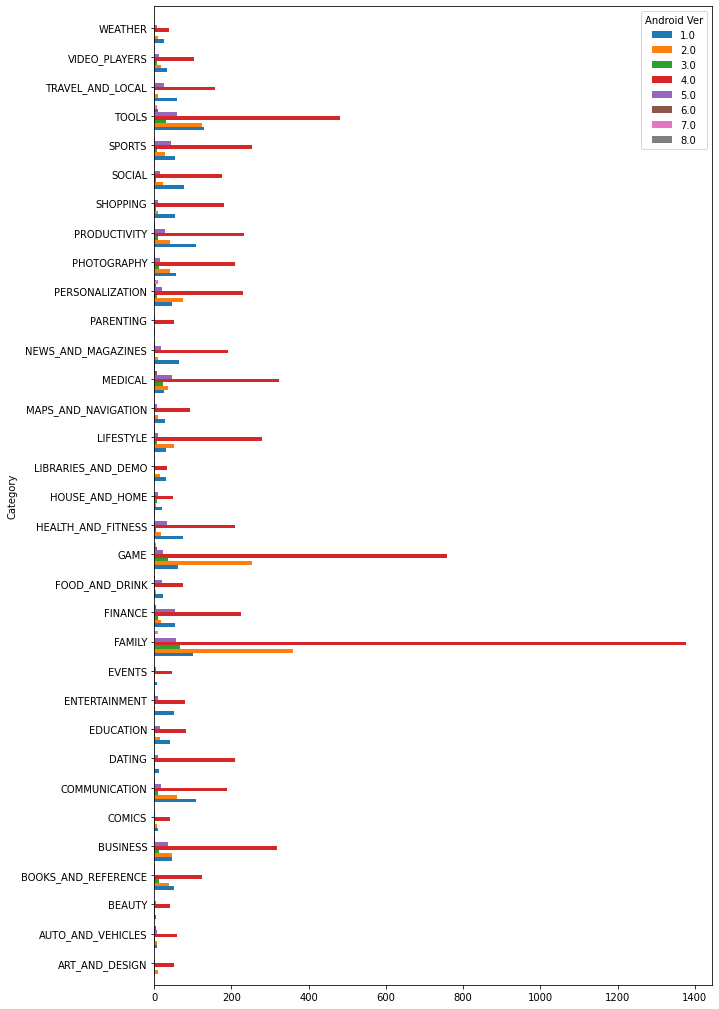

In [147]:
print(df_data.groupby('Category')['Android Ver'].value_counts())
Type_cat = df_data.groupby('Category')['Android Ver'].value_counts().unstack().plot.barh(figsize=(10,18), width=1)
plt.show()

The Type column, let’s check if the app is free or paid.

In [148]:
# Type for category
df_data.Type.unique()

array(['Free', 'Paid'], dtype=object)

Category           Type
ART_AND_DESIGN     Free     62
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
BEAUTY             Free     53
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    171
                   Paid      4
WEATHER            Free     74
                   Paid      8
Name: Type, Length: 63, dtype: int64


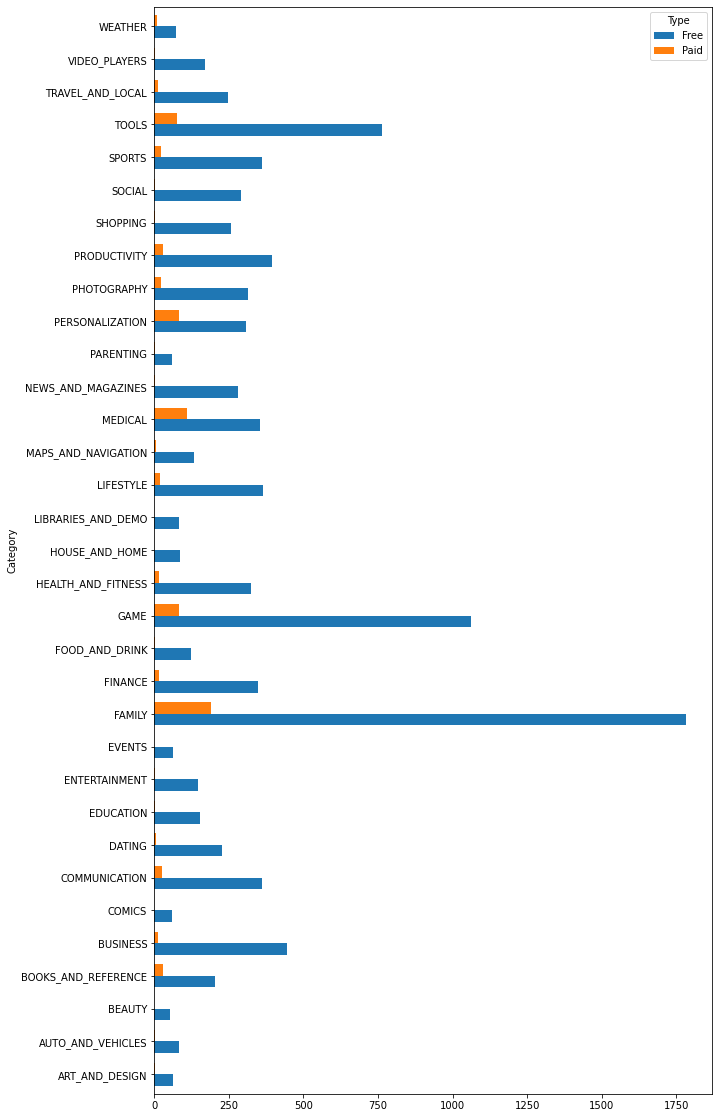

In [149]:
print(df_data.groupby('Category')['Type'].value_counts())
Type_cat = df_data.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)
plt.show()

So again, family category has the most free and paid app on the google play store. We can see social app is always free, like entertainment, event, education, comic, and more.

The medical has a high amount of paid app considering quantity of medical app is not much.

In [83]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,1,33
Rating,float64,1474,39
Reviews,float64,0,6001
Size,object,0,461
Installs,float64,0,6001
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,120


In [85]:
df_data.shape

(10840, 13)

In [84]:
df_data.describe()

,Rating,Reviews,Installs
count,9366.000000,1.084000e+04,1.084000e+04
mean,4.191501,4.441529e+05,4.441529e+05
std,0.515762,2.927761e+06,2.927761e+06
min,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,3.800000e+01,3.800000e+01
50%,4.300000,2.094000e+03,2.094000e+03
75%,4.500000,5.477550e+04,5.477550e+04
max,5.000000,7.815831e+07,7.815831e+07


**DATA VISUALIZATION** 

In [ ]:
df_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068145,0.082164,0.068145,0.068145
Reviews,0.068145,1.000000,0.233787,1.000000,1.000000
Size,0.082164,0.233787,1.000000,0.233787,0.233787
Installs,0.068145,1.000000,0.233787,1.000000,1.000000
Price,0.068145,1.000000,0.233787,1.000000,1.000000


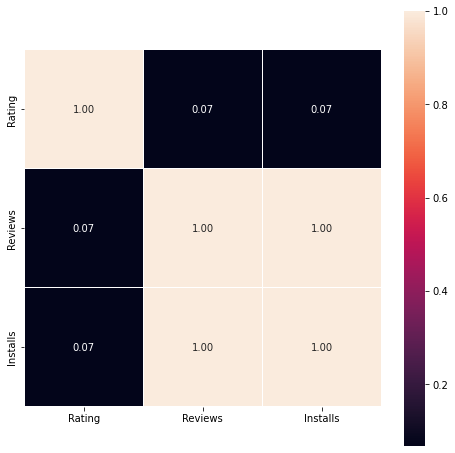

In [86]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df_data.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

**Asking and Answering Questions**

In [87]:
# What is the top 5 apps on the basis of installs?
PSD_DF = df_data.sort_values(by=['Installs'], ascending=False)
df_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,159.0,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,967.0,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,87510.0,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,215644.0,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,967.0,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.0


The 5 apps that have the most number of installs are:Photo Editor & Candy Camera & Grid & ScrapBook	, Coloring book moana, U Launcher Lite – FREE Live Cool Themes, Hide ,Sketch - Draw & Paint, Pixel Draw - Number Art Coloring Book

In [88]:
# 2. What is the top 5 reviewed apps?
df_data = df_data.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df_data = df_data.sort_values(by=['Reviews'], ascending=False)
df_data.head(5)

,App,Category,Rating,Reviews
4472,Instagram,SOCIAL,4.5,266241989.0
7753,WhatsApp Messenger,COMMUNICATION,4.4,207348304.0
5151,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,169932272.0
6884,Subway Surfers,GAME,4.5,166331958.0
3466,Facebook,SOCIAL,4.1,156286514.0


The 5 apps that have the most number of total reviews are: Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Subway Sufers.